In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cigs = pd.read_csv('cigs.csv')

In [3]:
cigs.head()

,Brand_Name,flavor,CO,nic,tar,size,filter,pack,menthol
0,Alpine,NaN,15,1.1,16.0,100,F,SP,yes
1,Alpine,Lt,12,0.8,10.0,100,F,SP,yes
2,Alpine,NaN,15,1.1,16.0,King,F,HP,yes
3,Alpine,Lt,11,0.7,10.0,King,F,HP,yes
4,Alpine,NaN,16,1.0,16.0,King,F,SP,yes


In [14]:
cigs.dropna()

,Brand_Name,flavor,CO,nic,tar,size,filter,pack,menthol
1,Alpine,Lt,12,0.8,10.0,100,F,SP,yes
3,Alpine,Lt,11,0.7,10.0,King,F,HP,yes
5,Alpine,Lt,10,0.7,9.0,King,F,SP,yes
6,American,FF,16,0.9,14.0,100,F,SP,no
7,American,Lt,13,0.7,10.0,100,F,SP,no
...,...,...,...,...,...,...,...,...,...
1119,Worth*,FF,16,0.8,14.0,King,F,SP,no
1120,Worth*,FF,17,0.8,14.0,King,F,SP,yes
1121,Worth*,Lt,13,0.7,10.0,King,F,SP,no
1122,Worth*,Lt,12,0.6,9.0,King,F,SP,yes


In [28]:
from sklearn.model_selection import train_test_split

In [37]:
cigs_train, cigs_test = train_test_split(cigs, test_size=0.3, random_state=42, stratify=cigs['menthol'])
print(cigs_train.shape, cigs_test.shape)

(787, 9) (338, 9)


In [38]:
from sklearn.tree import DecisionTreeClassifier

## Decision tree op de trainingsset

In [44]:
features= ['CO']
dt = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt.fit(cigs_train[features], cigs_train['menthol'])

DecisionTreeClassifier(max_depth=1)

In [45]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

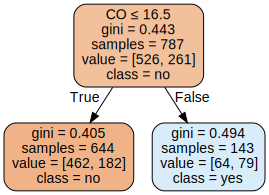

In [49]:
plot_tree_classification(dt, features, np.sort(cigs_train.menthol.unique()))

In [50]:
predictions = dt.predict(cigs_train[features])

In [51]:
predictions

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no',

In [52]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [53]:
calculate_accuracy(predictions, cigs_train['menthol'])

0.6874205844980941

## Decision tree op de testset

In [54]:
features= ['CO']
dt = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt.fit(cigs_test[features], cigs_test['menthol'])

DecisionTreeClassifier(max_depth=1)

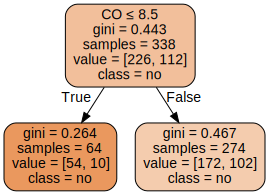

In [55]:
plot_tree_classification(dt, features, np.sort(cigs_test.menthol.unique()))

In [56]:
predictions = dt.predict(cigs_test[features])

In [57]:
predictions

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'n

In [59]:
calculate_accuracy(predictions, cigs_test.menthol)

0.6686390532544378

De accuracy van de testset is ,66 en die van de trainset is ,68. De trainset zal dus accurater zijn dan de testset door de meerdere samples. Bij de testset zijn de predictions ook alleen maar 'no', dit betekent dat dus de CO geen invloed heeft of de sigaret menthol is ja of nee. Bij de trainingset is dit wel het geval.